In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import math

from denoising.data import SIDD
from denoising.models import DnCNN

In [2]:
path = "../datasets/SIDD_small/"
full_ds = SIDD(root_dir = path, img_size = 256, patches = 2)

val_ratio = 0.2
n_total = len(full_ds)
n_val = max(1, int(n_total * val_ratio))
n_train = n_total - n_val

train_ds, val_ds = random_split(full_ds, [n_train, n_val])

In [3]:
batch_size = 4
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
len(train_ds), len(val_ds)

(256, 64)

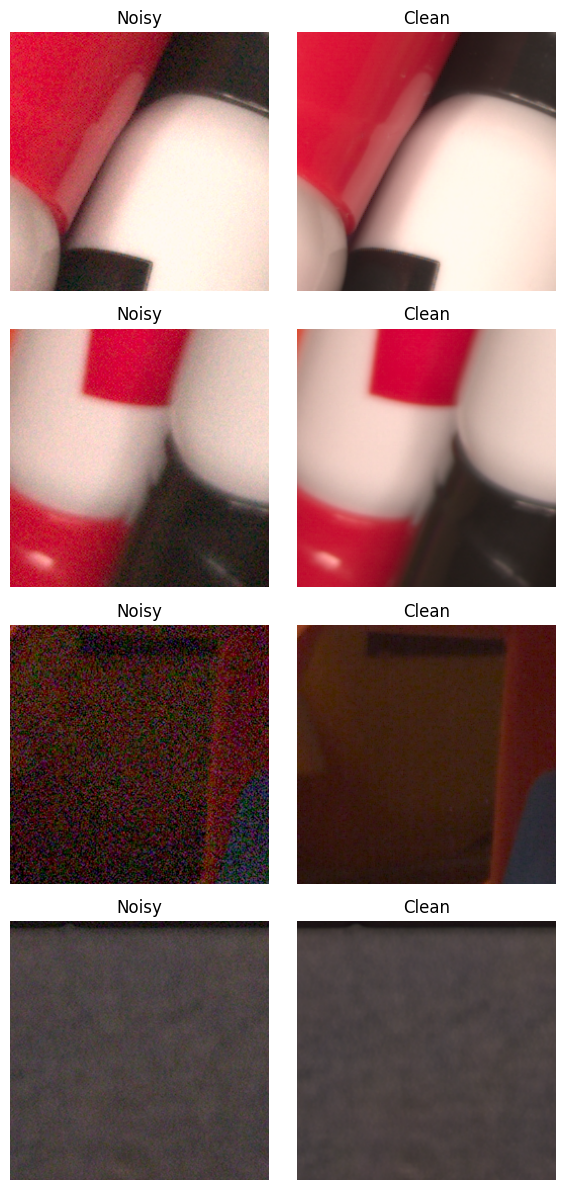

In [4]:
noisy_batch, clean_batch = next(iter(val_loader))

n = batch_size
fig, axes = plt.subplots(n, 2, figsize=(6, 3*n))

for i in range(n):
    noisy = noisy_batch[i].permute(1, 2, 0).cpu().numpy()
    clean = clean_batch[i].permute(1, 2, 0).cpu().numpy()

    axes[i, 0].imshow(noisy)
    axes[i, 0].set_title("Noisy")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(clean)
    axes[i, 1].set_title("Clean")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [5]:
def mse_metric(x, y):
    return F.mse_loss(x, y).item()

def psnr_metric(x, y):
    mse = F.mse_loss(x, y)
    return 20 * math.log10(1.0 / math.sqrt(mse.item() + 1e-8))

def evaluate_loader(loader):
    mse_total, psnr_total = 0.0, 0.0
    count = 0
    for noisy, clean in loader:
        denoised = noisy  
        
        mse_total += mse_metric(denoised, clean)
        psnr_total += psnr_metric(denoised, clean)
        count += 1

    print(f"Avg MSE: {mse_total / count:.6f}")
    print(f"Avg PSNR: {psnr_total / count:.2f} dB")

In [6]:
evaluate_loader(val_loader)

Avg MSE: 0.002567
Avg PSNR: 27.02 dB
